In [1]:
%pylab notebook
import matplotlib.pylab as plt
import pandas as pd
import re
pd.set_option('display.max_columns', 360)
pd.set_option('display.max_rows', 360)

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
modice_file = '/Users/brodzik/projects/MODICE/data/MASCONS/mascon_areas_by_year.v02.csv'
modice = pd.read_csv(modice_file)
modice.set_index('Year', inplace=True, verify_integrity=True, drop=True)

In [7]:
seaice_file = '/Users/brodzik/projects/MODICE/data/sii/nsidc0051_year_by_month.csv'
seaice = pd.read_csv(seaice_file)
seaice.set_index('Year', inplace=True, verify_integrity=True, drop=True)
seaice.drop([1999], inplace=True)
seaice

,01_total_extent_km2,02_total_extent_km2,03_total_extent_km2,04_total_extent_km2,05_total_extent_km2,06_total_extent_km2,07_total_extent_km2,08_total_extent_km2,09_total_extent_km2,10_total_extent_km2,11_total_extent_km2,12_total_extent_km2,01_total_area_km2,02_total_area_km2,03_total_area_km2,04_total_area_km2,05_total_area_km2,06_total_area_km2,07_total_area_km2,08_total_area_km2,09_total_area_km2,10_total_area_km2,11_total_area_km2,12_total_area_km2,01_laptev_extent_km2,02_laptev_extent_km2,03_laptev_extent_km2,04_laptev_extent_km2,05_laptev_extent_km2,06_laptev_extent_km2,07_laptev_extent_km2,08_laptev_extent_km2,09_laptev_extent_km2,10_laptev_extent_km2,11_laptev_extent_km2,12_laptev_extent_km2,01_laptev_area_km2,02_laptev_area_km2,03_laptev_area_km2,04_laptev_area_km2,05_laptev_area_km2,06_laptev_area_km2,07_laptev_area_km2,08_laptev_area_km2,09_laptev_area_km2,10_laptev_area_km2,11_laptev_area_km2,12_laptev_area_km2,01_kara_extent_km2,02_kara_extent_km2,03_kara_extent_km2,04_kara_extent_km2,05_kara_extent_km2,06_kara_extent_km2,07_kara_extent_km2,08_kara_extent_km2,09_kara_extent_km2,10_kara_extent_km2,11_kara_extent_km2,12_kara_extent_km2,01_kara_area_km2,02_kara_area_km2,03_kara_area_km2,04_kara_area_km2,05_kara_area_km2,06_kara_area_km2,07_kara_area_km2,08_kara_area_km2,09_kara_area_km2,10_kara_area_km2,11_kara_area_km2,12_kara_area_km2,01_eastsiberian_extent_km2,02_eastsiberian_extent_km2,03_eastsiberian_extent_km2,04_eastsiberian_extent_km2,05_eastsiberian_extent_km2,06_eastsiberian_extent_km2,07_eastsiberian_extent_km2,08_eastsiberian_extent_km2,09_eastsiberian_extent_km2,10_eastsiberian_extent_km2,11_eastsiberian_extent_km2,12_eastsiberian_extent_km2,01_eastsiberian_area_km2,02_eastsiberian_area_km2,03_eastsiberian_area_km2,04_eastsiberian_area_km2,05_eastsiberian_area_km2,06_eastsiberian_area_km2,07_eastsiberian_area_km2,08_eastsiberian_area_km2,09_eastsiberian_area_km2,10_eastsiberian_area_km2,11_eastsiberian_area_km2,12_eastsiberian_area_km2,01_stlawrence_extent_km2,02_stlawrence_extent_km2,03_stlawrence_extent_km2,04_stlawrence_extent_km2,05_stlawrence_extent_km2,06_stlawrence_extent_km2,07_stlawrence_extent_km2,08_stlawrence_extent_km2,09_stlawrence_extent_km2,10_stlawrence_extent_km2,11_stlawrence_extent_km2,12_stlawrence_extent_km2,01_stlawrence_area_km2,02_stlawrence_area_km2,03_stlawrence_area_km2,04_stlawrence_area_km2,05_stlawrence_area_km2,06_stlawrence_area_km2,07_stlawrence_area_km2,08_stlawrence_area_km2,09_stlawrence_area_km2,10_stlawrence_area_km2,11_stlawrence_area_km2,12_stlawrence_area_km2,01_hudson_extent_km2,02_hudson_extent_km2,03_hudson_extent_km2,04_hudson_extent_km2,05_hudson_extent_km2,06_hudson_extent_km2,07_hudson_extent_km2,08_hudson_extent_km2,09_hudson_extent_km2,10_hudson_extent_km2,11_hudson_extent_km2,12_hudson_extent_km2,01_hudson_area_km2,02_hudson_area_km2,03_hudson_area_km2,04_hudson_area_km2,05_hudson_area_km2,06_hudson_area_km2,07_hudson_area_km2,08_hudson_area_km2,09_hudson_area_km2,10_hudson_area_km2,11_hudson_area_km2,12_hudson_area_km2,01_baffin_extent_km2,02_baffin_extent_km2,03_baffin_extent_km2,04_baffin_extent_km2,05_baffin_extent_km2,06_baffin_extent_km2,07_baffin_extent_km2,08_baffin_extent_km2,09_baffin_extent_km2,10_baffin_extent_km2,11_baffin_extent_km2,12_baffin_extent_km2,01_baffin_area_km2,02_baffin_area_km2,03_baffin_area_km2,04_baffin_area_km2,05_baffin_area_km2,06_baffin_area_km2,07_baffin_area_km2,08_baffin_area_km2,09_baffin_area_km2,10_baffin_area_km2,11_baffin_area_km2,12_baffin_area_km2,01_bering_extent_km2,02_bering_extent_km2,03_bering_extent_km2,04_bering_extent_km2,05_bering_extent_km2,06_bering_extent_km2,07_bering_extent_km2,08_bering_extent_km2,09_bering_extent_km2,10_bering_extent_km2,11_bering_extent_km2,12_bering_extent_km2,01_bering_area_km2,02_bering_area_km2,03_bering_area_km2,04_bering_area_km2,05_bering_area_km2,06_bering_area_km2,07_bering_area_km2,08_bering_area_km2,09_bering_area_km2,10_bering_area_km2,11_bering_area_km2,12_bering_

In [62]:
# Calculate residuals
# Subtract the column mean from every element in both Data Frames
modice_res = modice - modice.mean()
seaice_res = seaice - seaice.mean()

In [25]:
# Get a list of all MASCON areas (these will be rows)
modice.columns

Index([u'NHem_1strike_MODICE_area_km^2', u'NHem_1strike_MODICE_NS_km^2',
       u'NHem_2strike_MODICE_area_km^2', u'NHem_2strike_MODICE_NS_km^2',
       u'NHem_3strike_MODICE_area_km^2', u'NHem_3strike_MODICE_NS_km^2',
       u'Arctic_1strike_MODICE_area_km^2', u'Arctic_1strike_MODICE_NS_km^2',
       u'Arctic_2strike_MODICE_area_km^2', u'Arctic_2strike_MODICE_NS_km^2',
       ...
       u'Tianshn_2strike_MODICE_area_km^2', u'Tianshn_2strike_MODICE_NS_km^2',
       u'Tianshn_3strike_MODICE_area_km^2', u'Tianshn_3strike_MODICE_NS_km^2',
       u'Tib+Qil_1strike_MODICE_area_km^2', u'Tib+Qil_1strike_MODICE_NS_km^2',
       u'Tib+Qil_2strike_MODICE_area_km^2', u'Tib+Qil_2strike_MODICE_NS_km^2',
       u'Tib+Qil_3strike_MODICE_area_km^2', u'Tib+Qil_3strike_MODICE_NS_km^2'],
      dtype='object', length=126)

In [50]:
p = re.compile(r'(.+_1strike_MODICE_area_km\^2)')

In [52]:
mascons1 = [p.search(col).group(1) for col in modice.columns if p.search(col)]
mascons1

['NHem_1strike_MODICE_area_km^2',
 'Arctic_1strike_MODICE_area_km^2',
 'Alaskag_1strike_MODICE_area_km^2',
 'Altaigl_1strike_MODICE_area_km^2',
 'Baffing_1strike_MODICE_area_km^2',
 'Ellesme_1strike_MODICE_area_km^2',
 'FrnJLnd_1strike_MODICE_area_km^2',
 'Greenland_1strike_MODICE_area_km^2',
 'HghMtnA_1strike_MODICE_area_km^2',
 'Him+Kar_1strike_MODICE_area_km^2',
 'Iceland_1strike_MODICE_area_km^2',
 'NW_Amer_1strike_MODICE_area_km^2',
 'Nov_Zem_1strike_MODICE_area_km^2',
 'Nthasia_1strike_MODICE_area_km^2',
 'Pam+Kun_1strike_MODICE_area_km^2',
 'Scandin_1strike_MODICE_area_km^2',
 'Sev_Zem_1strike_MODICE_area_km^2',
 'Sib+Kam_1strike_MODICE_area_km^2',
 'Svalbar_1strike_MODICE_area_km^2',
 'Tianshn_1strike_MODICE_area_km^2',
 'Tib+Qil_1strike_MODICE_area_km^2']

In [66]:
modice1_res = modice_res[mascons1]
modice1_res

,NHem_1strike_MODICE_area_km^2,Arctic_1strike_MODICE_area_km^2,Alaskag_1strike_MODICE_area_km^2,Altaigl_1strike_MODICE_area_km^2,Baffing_1strike_MODICE_area_km^2,Ellesme_1strike_MODICE_area_km^2,FrnJLnd_1strike_MODICE_area_km^2,Greenland_1strike_MODICE_area_km^2,HghMtnA_1strike_MODICE_area_km^2,Him+Kar_1strike_MODICE_area_km^2,Iceland_1strike_MODICE_area_km^2,NW_Amer_1strike_MODICE_area_km^2,Nov_Zem_1strike_MODICE_area_km^2,Nthasia_1strike_MODICE_area_km^2,Pam+Kun_1strike_MODICE_area_km^2,Scandin_1strike_MODICE_area_km^2,Sev_Zem_1strike_MODICE_area_km^2,Sib+Kam_1strike_MODICE_area_km^2,Svalbar_1strike_MODICE_area_km^2,Tianshn_1strike_MODICE_area_km^2,Tib+Qil_1strike_MODICE_area_km^2
Year,,,,,,,,,,,,,,,,,,,,,
2000,86371.03125,75894.825,21688.1875,173.0375,2185.5125,410.5875,239.20625,7219.40625,5817.8875,3030.88125,485.95,6852.21875,408.09375,698.64375,-535.525,2716.9625,181.2375,525.63125,2284.31875,3180.13125,142.36875
2001,31151.43125,36053.325,11890.4875,-5.1625,1074.8125,6088.2875,11.70625,3924.60625,-5461.7125,278.18125,517.75,3818.41875,-569.50625,158.14375,-5857.925,-392.5375,128.0375,163.33125,-314.58125,545.13125,-427.13125
2002,17284.63125,11911.925,2386.4875,-35.4625,1476.2125,3154.0875,140.20625,958.90625,3937.0875,2454.58125,65.45,3818.81875,334.69375,463.14375,878.675,-1028.1375,-78.4625,498.63125,-1406.98125,432.43125,171.36875
2003,2738.53125,-8358.275,-4177.3125,-73.1625,1469.4125,166.8875,119.40625,97.00625,7493.5875,2240.08125,165.45,-1761.18125,82.69375,0.14375,3637.475,-787.3375,401.3375,73.33125,-1909.88125,977.53125,638.46875
2004,26674.23125,11770.425,-13241.5125,-49.3625,2914.5125,8495.8875,-68.59375,1698.20625,11238.8875,1741.28125,250.75,-3971.58125,-825.30625,1395.14375,8717.775,-291.6375,-520.8625,1444.63125,-1982.28125,571.13125,208.66875
2005,-4293.26875,-14195.475,-4557.5125,41.8375,1355.0125,-589.1125,12.10625,-1792.59375,7439.2875,765.88125,142.75,-633.78125,-193.20625,354.94375,4873.075,975.2625,-626.0625,313.13125,159.21875,1053.73125,746.56875
2006,20203.33125,28978.825,3242.0875,7.5375,1996.6125,3675.4875,95.60625,5624.50625,-6455.4125,-2082.01875,-127.95,-2475.38125,253.09375,-84.45625,-2890.525,-1299.7375,-161.7625,-91.96875,547.91875,-1032.96875,-449.93125
2007,-1873.16875,3201.325,-2301.2125,-98.3625,403.0125,-2684.0125,79.30625,-549.09375,-5943.2125,-686.71875,-138.25,6394.11875,-452.30625,-153.55625,-4247.125,1737.9625,1035.6375,-55.26875,660.61875,-1130.86875,121.56875
2008,10317.73125,14223.625,17630.6875,-217.0625,-1555.7875,-3725.0125,-1022.59375,-76.99375,-5319.0125,2055.78125,148.75,3796.31875,-306.30625,-311.15625,-6918.625,-57.9375,268.4375,-94.06875,1681.11875,-1409.06875,952.86875


In [68]:
my_modice_res = modice1_res["NHem_1strike_MODICE_area_km^2"]
my_modice_res

Year
2000    86371.03125
2001    31151.43125
2002    17284.63125
2003     2738.53125
2004    26674.23125
2005    -4293.26875
2006    20203.33125
2007    -1873.16875
2008    10317.73125
2009    -4708.16875
2010   -61255.06875
2011   -50051.16875
2012   -16575.56875
2013   -24555.06875
2014    -7541.66875
2015   -23887.76875
Name: NHem_1strike_MODICE_area_km^2, dtype: float64

In [69]:
my_seaice_res = seaice_res["01_total_area_km2"]
my_seaice_res

Year
2000    184243.625
2001    235773.625
2002    148838.625
2003    176647.625
2004    146200.625
2005   -198542.375
2006   -465500.375
2007   -254332.375
2008    172166.625
2009    198896.625
2010    -80579.375
2011   -288084.375
2012     94856.625
2013    -95021.375
2014    -27515.375
2015     51951.625
Name: 01_total_area_km2, dtype: float64

<IPython.core.display.Javascript object>


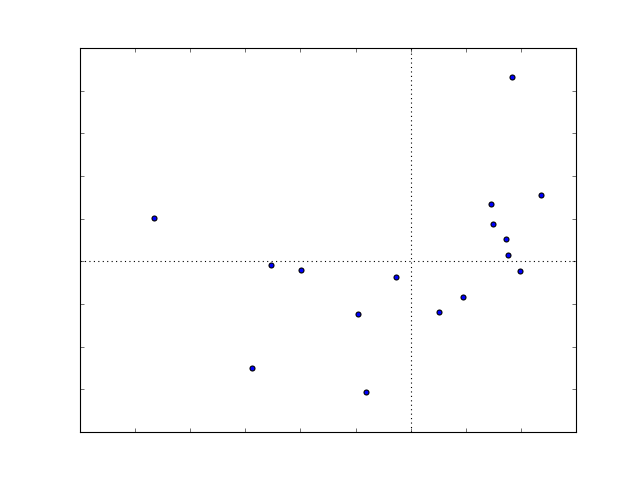

[]

In [78]:
fig, ax = plt.subplots(1)
ax.scatter(x=my_seaice_res, y=my_modice_res)
ax.axhline(y=0.0, color='k', linestyle=":")
ax.axvline(x=0.0, color='k', linestyle=":")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

<IPython.core.display.Javascript object>


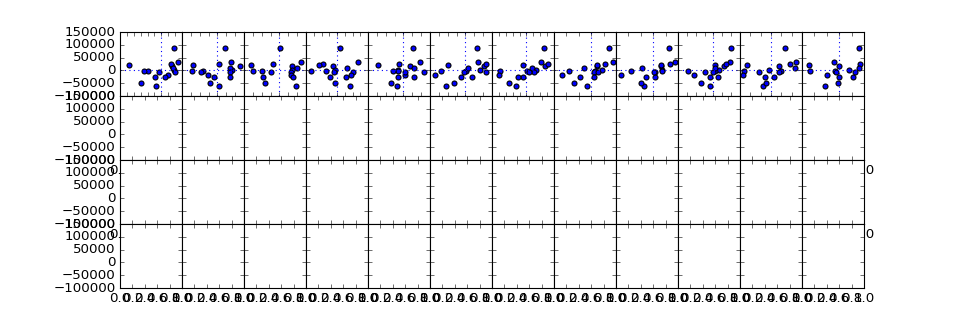

In [102]:
months = np.arange(12) + 1
nrows = 4
ncols = 12
fig, ax = plt.subplots(nrows, ncols, sharey=True, figsize=(ncols, nrows))
modice_column = 'NHem_1strike_MODICE_area_km^2'
modice_label = 'NHem_MODICE(1)_area'
seaice_column = 'total_area_km2'
for col, month in enumerate(months):
    row = 0
    x_column = "%02d_%s" % (month, seaice_column)
    ax[row, col].scatter(
        x=seaice_res[x_column],
        y=modice1_res[modice_column])
    ax[row, col].set_xticklabels([])
    ax[row, col].axhline(y=0.0, linestyle=":")
    ax[row, col].axvline(x=0.0, linestyle=":")
    if col==0:
        ax[row, col].set_ylabel='Nhem'

fig.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()